# Migration Flows to Europe



---


  **Baris Alan**

Final Data Science Tutorial

CMPS 6790 - Data Science


[Online Access to the Project](https://barisalan00.github.io/)

[For Project Datasets](https://github.com/barisalan00/barisalan00.github.io)

---

## Project Topic and Goals

The advanced liberal democracies in the Western world stand as an attractive destination for populations in the developing world, driven by a myriad of pull and push factors. Pull factors encompass liberal developed democracies offering employment opportunities, and providing rule of law and equal treatment before the law. Conversely, push factors comprise issues such as unemployment, poverty, corruption, civil war, and the impact of climate change. European countries, in particular, emerge as a desirable destination for numerous nations in Africa, the Middle East, and West Asia.

The primary objective of this project is to conduct a comprehensive analysis and visualization of migration flows to the European Union (EU) countries from regions outside Europe. The key areas of focus include examining the demographic structure and educational background of migrants, identifying their countries of origin and the EU countries they choose for settlement, and mapping out the migration routes and transit countries they navigate.

By addressing these aspects, the project aims to provide valuable insights into the dynamics of migration to the EU, shedding light on the factors influencing migration patterns and contributing to a nuanced understanding of the complex interplay between push and pull factors in the context of global migration.

## Project Dataset
This project will utilize various datasets from different institutions.

#### The First Dataset
The primary dataset is sourced from [Eurostat](https://ec.europa.eu/eurostat), the official statistical administration of the EU. Specifically, I obtained the dataset from the [Migration and Population Statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics) section, focusing on [immigration by age group, sex, and citizenship](https://ec.europa.eu/eurostat/databrowser/view/migr_imm1ctz__custom_10260387/default/table?lang=en). This dataset provides the total number of migrants based on specified filters, allowing researchers to analyze immigration by receiving country, immigrant citizenship, year, age group, and gender.

Due to Eurostat's data download limitations, careful selection of attributes was necessary. Specifically, (1) I narrowed down the country of citizenship options to 218, excluding EU and non-EU European countries to focus on immigration from other regions to Europe. Additionally, regional groupings such as Africa and South Asia were included for future analysis. (2) Receiving countries were limited to 27 EU nations. (3) Gender analysis was conducted for all available options (Male-Female-Total). (4) Age-based analysis was performed by selecting total and specific age brackets. (5) The dataset was filtered for the year 2021, with plans to include data from previous years for a comprehensive analysis of changing migration flows.

Key questions addressed with the first dataset include: "What is the total number of arrivals in EU countries in 2021?", "What are the demographic characteristics of immigrants based on gender and age?", and "Which EU countries received the highest number of immigrants?", and lastly "Which sent the highest number of immigrants?"

#### The Second Dataset
For the second dataset, a country codes dataset was utilized, incorporating 2-digit country codes and corresponding country names. While the ideal dataset would be from the [International Standards Organization](https://www.iso.org/publication/PUB500001.html), which was provided for 300 Swiss Franc.Thus a similar dataset from [Datahub.io](https://datahub.io/core/country-list) was utilized. This dataset serves the sole purpose of associating country names with citizenship and receiving country codes in the immigration dataset.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone Github Repository
!git clone https://github.com/barisalan00/barisalan00.github.io.git

## ETL (Extract, Transform, Load)

### Import Datasets

In [28]:
# Import EU Immigration/2021 Dataset (Eurostate)
euim_21 = pd.read_csv('/content/barisalan00.github.io/Eurostat-2021Migration-migr_imm1ctz__custom_10260749_linear.csv')
display(euim_21.head())

# Total number of rows: 91103
display(euim_21.tail())

# Import country codes dataset (datahub.io)
country_codes = pd.read_csv('/content/barisalan00.github.io/Datahub-CountryCodes-data_csv.csv')
display(country_codes.head())

,DATAFLOW,LAST UPDATE,freq,citizen,agedef,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,AE,REACH,TOTAL,NR,F,AT,2021,3,NaN
1,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,AE,REACH,TOTAL,NR,F,BG,2021,1,NaN
2,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,AE,REACH,TOTAL,NR,F,CZ,2021,0,NaN
3,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,AE,REACH,TOTAL,NR,F,DK,2021,0,NaN
4,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,AE,REACH,TOTAL,NR,F,FI,2021,0,NaN


,DATAFLOW,LAST UPDATE,freq,citizen,agedef,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
91099,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,ZW,REACH,Y_LT15,NR,T,LU,2021,3,NaN
91100,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,ZW,REACH,Y_LT15,NR,T,LV,2021,0,NaN
91101,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,ZW,REACH,Y_LT15,NR,T,NL,2021,13,NaN
91102,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,ZW,REACH,Y_LT15,NR,T,SE,2021,13,NaN
91103,ESTAT:MIGR_IMM1CTZ(1.0),3/10/23 23:00,A,ZW,REACH,Y_LT15,NR,T,SK,2021,0,NaN


,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


### Transform and Tidy Data

In [29]:
# Check the dtypes for euim_21
# The year and flow columns are integer, and the rest is object as expected.
euim_21.dtypes

,0
DATAFLOW,object
LAST UPDATE,object
freq,object
citizen,object
agedef,object
age,object
unit,object
sex,object
geo,object
TIME_PERIOD,int64


In [30]:
# Keep only necessary columns and drop redundant ones
euim_21 = euim_21[['citizen', 'age', 'sex', 'geo', 'TIME_PERIOD', 'OBS_VALUE']]
euim_21.head()

,citizen,age,sex,geo,TIME_PERIOD,OBS_VALUE
0,AE,TOTAL,F,AT,2021,3
1,AE,TOTAL,F,BG,2021,1
2,AE,TOTAL,F,CZ,2021,0
3,AE,TOTAL,F,DK,2021,0
4,AE,TOTAL,F,FI,2021,0


In [31]:
# Rename colums for readability
euim_21.rename(columns={'citizen':'Migrant_Citizenship',
                        'age': 'Age',
                        'sex': 'Gender',
                        'geo':'Receiving_CCode',
                        'TIME_PERIOD':'Year',
                        'OBS_VALUE':'Flow'},inplace=True)
euim_21.head()

,Migrant_Citizenship,Age,Gender,Receiving_CCode,Year,Flow
0,AE,TOTAL,F,AT,2021,3
1,AE,TOTAL,F,BG,2021,1
2,AE,TOTAL,F,CZ,2021,0
3,AE,TOTAL,F,DK,2021,0
4,AE,TOTAL,F,FI,2021,0


Despite the Eurostat system displaying country names for the country codes when filtering data online, the downloaded dataset does not include these names. Consequently, I will leverage the "country_codes" dataset from datahub.io to retrieve country names for both Citizenship and Receiving_Country codes. This step ensures a comprehensive and accurate representation of country names in the analysis.

In [32]:
# Bring country name information for Migrant Citizenship column (left join to keep all observations at euim_21)
euim_21 = pd.merge(euim_21, country_codes, left_on='Migrant_Citizenship', right_on='Code', how='left')

# Drop the redundant "Code" column
euim_21.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Sending_Country'
euim_21.rename(columns={'Name':'Sending_Country'}, inplace=True)

# Move Migrant_Country after Migrant_Citizenship
col = euim_21.pop('Sending_Country')
euim_21.insert(1, col.name, col)


euim_21.head()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Year,Flow
0,AE,United Arab Emirates,TOTAL,F,AT,2021,3
1,AE,United Arab Emirates,TOTAL,F,BG,2021,1
2,AE,United Arab Emirates,TOTAL,F,CZ,2021,0
3,AE,United Arab Emirates,TOTAL,F,DK,2021,0
4,AE,United Arab Emirates,TOTAL,F,FI,2021,0


In [33]:
# Bring country name information for Receiving Country Column (left join to keep all observations at euim_21)
euim_21 = pd.merge(euim_21, country_codes, left_on='Receiving_CCode', right_on='Code', how='left')

# Drop the redundant "Code" column
euim_21.drop('Code', axis=1, inplace=True)

# Rename the 'Name' column to 'Receiving_Country'
euim_21.rename(columns={'Name':'Receiving_Country'}, inplace=True)

# Move Receiving_Country after Receiv_CCode
col = euim_21.pop('Receiving_Country')
euim_21.insert(5, col.name, col)


euim_21.head()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
0,AE,United Arab Emirates,TOTAL,F,AT,Austria,2021,3
1,AE,United Arab Emirates,TOTAL,F,BG,Bulgaria,2021,1
2,AE,United Arab Emirates,TOTAL,F,CZ,Czech Republic,2021,0
3,AE,United Arab Emirates,TOTAL,F,DK,Denmark,2021,0
4,AE,United Arab Emirates,TOTAL,F,FI,Finland,2021,0


In [34]:
# Check if we lost any cells at the merge operations.
# We had 91103th as the last observation at the beginning, and and it is still there, we are not missing anything.
euim_21.tail()

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
91099,ZW,Zimbabwe,Y_LT15,T,LU,Luxembourg,2021,3
91100,ZW,Zimbabwe,Y_LT15,T,LV,Latvia,2021,0
91101,ZW,Zimbabwe,Y_LT15,T,NL,Netherlands,2021,13
91102,ZW,Zimbabwe,Y_LT15,T,SE,Sweden,2021,13
91103,ZW,Zimbabwe,Y_LT15,T,SK,Slovakia,2021,0


In [35]:
# Is there any missing values under Receiving_Country?
# 'EL' is country code for Greece. Greece is using both 'GR' (in international systems) and 'EL' (in European systems) as its country code.
euim_21[euim_21['Receiving_Country'].isna()]

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
29903,FOR_STLS,NaN,TOTAL,F,EL,NaN,2021,10743
29930,FOR_STLS,NaN,TOTAL,M,EL,NaN,2021,17985
29957,FOR_STLS,NaN,TOTAL,T,EL,NaN,2021,28728
57287,NAT,NaN,TOTAL,F,EL,NaN,2021,13256
57314,NAT,NaN,TOTAL,M,EL,NaN,2021,15136
57341,NAT,NaN,TOTAL,T,EL,NaN,2021,28392
79742,TOTAL,NaN,TOTAL,F,EL,NaN,2021,23999
79769,TOTAL,NaN,TOTAL,M,EL,NaN,2021,33121
79796,TOTAL,NaN,TOTAL,T,EL,NaN,2021,57120
83957,UNK,NaN,TOTAL,F,EL,NaN,2021,0


In [36]:
# Fill these NaN values for 'EL' with Greece
euim_21['Receiving_Country'].fillna('Greece', inplace=True)

euim_21[euim_21['Receiving_CCode']=='EL']

<ipython-input-36-2a683292f5e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  euim_21['Receiving_Country'].fillna('Greece', inplace=True)


,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
29903,FOR_STLS,NaN,TOTAL,F,EL,Greece,2021,10743
29930,FOR_STLS,NaN,TOTAL,M,EL,Greece,2021,17985
29957,FOR_STLS,NaN,TOTAL,T,EL,Greece,2021,28728
57287,NAT,NaN,TOTAL,F,EL,Greece,2021,13256
57314,NAT,NaN,TOTAL,M,EL,Greece,2021,15136
57341,NAT,NaN,TOTAL,T,EL,Greece,2021,28392
79742,TOTAL,NaN,TOTAL,F,EL,Greece,2021,23999
79769,TOTAL,NaN,TOTAL,M,EL,Greece,2021,33121
79796,TOTAL,NaN,TOTAL,T,EL,Greece,2021,57120
83957,UNK,NaN,TOTAL,F,EL,Greece,2021,0


In [37]:
# Is there any NaN cells under Sending_Country column? --> 14,451 observations are missing.
euim_21['Sending_Country'].isna().sum()

14451

In [38]:
# Let's check the unique values for these 14451 NaN observations.
euim_21[euim_21['Sending_Country'].isna()]['Migrant_Citizenship'].unique()

array(['AFR', 'AFR_C', 'AFR_E', 'AFR_N', 'AFR_S', 'AFR_W', 'AME', 'AME_C',
       'AME_N', 'AME_S', 'ASI', 'ASI_C', 'ASI_E', 'ASI_S', 'ASI_S_E',
       'ASI_W', 'AU_NZ', 'CRB', 'FOR_STLS', 'MEL', 'MIC', 'NAT', 'OCE',
       'POL', 'RNC', 'STLS', 'TOTAL', 'UNK'], dtype=object)

The NaN values under the "Sending_Country" column correspond to the codes displayed in the array above. Notably, these codes are not 2-digit but rather 3-digit and longer.

As per the Eurostat system, most of these codes represent continents such as AFR=Africa, ASI_W=West Asia, which aggregate the sum of countries within these continents. While the immigrant numbers for continents may introduce duplicates, they remain crucial for continental flow analysis.

Additionally, specific codes represent regions such as 'AU_NZ': Australia-New Zealand, 'CRB': Caribbean, 'FOR_STLS': Foreign Country and Stateless, 'MEL': Melanesia, 'MIC': Micronesia, 'NAT': Reporting Country, 'OCE': Oceania, 'POL': Polynesia, 'RNC': Recognized Non-Citizens, 'STLS': Stateless, 'TOTAL': Total, 'UNK': Unknown.

For analytical purposes, all continents and continent-like observations will be excluded from the primary analysis. A secondary continental dataset will be created, and these observations will be removed from the "euim_21" dataset to prevent duplication. However, 'STLS': Stateless, 'RNC': Recognized Non-Citizens, and 'UNK': Unknown will be retained in the original dataset, as these observations are not represented under any country-observations and can be treated as distinct entities.

In [39]:
# Replace the NaN Values under Migrant_Country for these ('STLS':Stateless, 'RNC':Recognized Non-Citizens and 'UNK':Unknown) under Migrant_Ciizenship
# Therefore all non-NaN observatoins under Migrant_Country column are part of our analysis.
euim_21.loc[euim_21[euim_21['Migrant_Citizenship'] == 'STLS'].index, 'Sending_Country'] = 'Stateless'
euim_21.loc[euim_21[euim_21['Migrant_Citizenship'] == 'RNC'].index, 'Sending_Country'] = 'Recognized Non-Citizens'
euim_21.loc[euim_21[euim_21['Migrant_Citizenship'] == 'UNK'].index, 'Sending_Country'] = 'Unkown'


#Is there still any NaN Values? --> There are 0 NaN values under Sending_Country column for these (STLS, RNC, UNK) observations under Migrant_Citizenship column
euim_21[(euim_21['Migrant_Citizenship']=='STLS') & (euim_21['Migrant_Citizenship']=='RNC') & (euim_21['Migrant_Citizenship']=='UNK')]['Sending_Country'].isna().sum()

0

In [40]:
# Create a 2nd dataset to keep continental observations.
euim_21_continents = euim_21

# Now we can delete the continent observations from the euim_21 (which are NA observations under Sending_Country column)
euim_21 = euim_21.dropna(subset=['Sending_Country'])

euim_21

,Migrant_Citizenship,Sending_Country,Age,Gender,Receiving_CCode,Receiving_Country,Year,Flow
0,AE,United Arab Emirates,TOTAL,F,AT,Austria,2021,3
1,AE,United Arab Emirates,TOTAL,F,BG,Bulgaria,2021,1
2,AE,United Arab Emirates,TOTAL,F,CZ,Czech Republic,2021,0
3,AE,United Arab Emirates,TOTAL,F,DK,Denmark,2021,0
4,AE,United Arab Emirates,TOTAL,F,FI,Finland,2021,0
...,...,...,...,...,...,...,...,...
91099,ZW,Zimbabwe,Y_LT15,T,LU,Luxembourg,2021,3
91100,ZW,Zimbabwe,Y_LT15,T,LV,Latvia,2021,0
91101,ZW,Zimbabwe,Y_LT15,T,NL,Netherlands,2021,13
91102,ZW,Zimbabwe,Y_LT15,T,SE,Sweden,2021,13


## Basic Summary Statistics

How many immigrants did arrive in the EU countries in 2021 from non-European countries?

In [41]:
# Total numer of immigrants arrived in the EU countries in 2021: 816,347.
# To calculate this we need (1) Select 'TOTAL' from 'Age' column and (2) 'T' from 'Gender' column to avoid duplicate calculation
euim_21[(euim_21['Age'] == 'TOTAL') & (euim_21['Gender'] == 'T')]['Flow'].sum()

816347

How does the gender distribution among immigrants break down?

It appears that there were more men than women arriving in the EU from non-European countries in 2021. A significant contributing factor to this trend is the presence of irregular migrants, who enter the EU illegally by crossing the Mediterranean and Aegean seas with the assistance of smugglers. Due to the perilous nature of these routes and the life-threatening aspects of the journey, men often aim to arrive first to secure asylum before bringing their families. Additionally, in regions such as the Middle East, Africa, and South Asia, young unmarried men are more likely to immigrate to Europe compared to young unmarried women.

The gender breakdown holds importance for various reasons. Some groups advocate for the inclusion of women, children, and the elderly while excluding men, while others argue that there is a labor shortage in the European labor market, making adult men crucial in filling this gap. More conservative groups express concerns about the potential impact of adult male immigrants on distorting European society. Therefore, understanding the gender and age demographics is crucial to assessing the validity of such perceived threats.

In [42]:
# Group by 'Gender column' and sum 'Flow' column
# There arrived 363,213 women and 453,134 men. 'T' represents the total.
total_immig = euim_21[(euim_21['Age'] == 'TOTAL')].groupby('Gender')['Flow'].sum()
print(total_immig)

Gender
F    363213
M    453134
T    816347
Name: Flow, dtype: int64


What about age demographics?

Approximately 60% (around 470K) of arriving immigrants are 34 years old or younger, with 101,203 falling within the age range of 15 years or younger. From the perspective of certain groups within the EU, these numbers may be perceived as a potential threat to European society. An additional observation is that as age increases, the number of immigrants arriving decreases, as depicted in the accompanying plot.

However, from a humanitarian standpoint, these figures underscore the desperation of immigrants who, in the face of civil war, economic hardships, or climate-related challenges, flee their home countries with their children, aspiring to reach Europe. Those in the age group of 20-29 are often individuals who have completed their education or recently started a family but struggle to make a living in their home countries. Frustration with poverty, corruption, and economic challenges compels them to seek better living conditions in Europe.

As future milestones incorporate additional datasets into the analysis, a clearer picture will emerge regarding the underlying reasons behind these migration patterns.

In [43]:
# Take the total ('T') from Gender column, and groupby 'Age'.
# Y_LT15: those below 15, and Y_GE65: those above 65. Other age breaks already make sense.
# reindex the age brackets in order
total_by_age = euim_21[(euim_21['Gender'] == 'T')].groupby('Age')['Flow'].sum()

# Reindex the age breaks from smallest to biggest
total_by_age.reindex(['TOTAL','Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65'])

,Flow
Age,
TOTAL,816347
Y_LT15,101203
Y15-19,55326
Y20-24,92925
Y25-29,124235
Y30-34,106513
Y35-39,78039
Y40-44,52930
Y45-49,36370


Text(0.5, 1.0, 'Total Flow Based on Age Breaks')

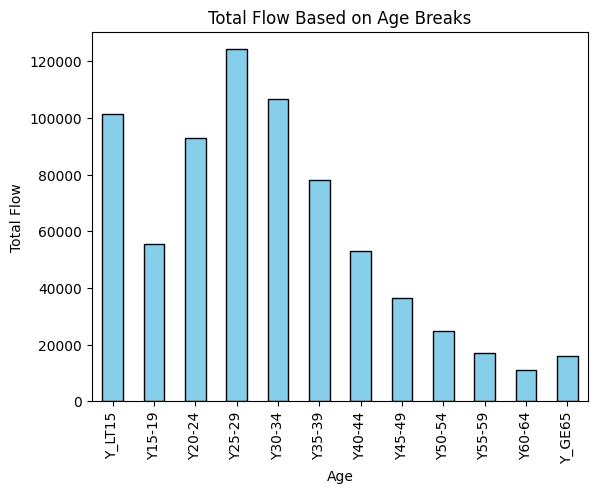

In [44]:
# Plot the age breaks (Leave the 'TOTAL' categery from reindexing out, and plot the breaks)
plot_by_age = total_by_age.reindex(['Y_LT15', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y_GE65']).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Age Breaks')


Which EU countries receive the highest number of immigrants?

Initially, both the plot and the list below indicate that Spain and Italy have received more than half of the total immigrants. This observation underscores that Africa and the Middle East remain the primary regions of origin for migrants.

Additionally, the substantial influx of immigrants into Central and Eastern EU countries is noteworthy, signifying the impact of the Invasion of Ukraine. This surge in migration patterns in these regions is a notable consequence of the geopolitical events in Ukraine.

In [45]:
# Total immigrants by receiving country
total_by_receiving = euim_21[(euim_21['Age'] == 'TOTAL') & (euim_21['Gender'] == 'T')].groupby('Receiving_Country')['Flow'].sum()

# Sort them
total_by_receiving = total_by_receiving.sort_values(ascending=False)

total_by_receiving

,Flow
Receiving_Country,
Spain,288900
Italy,167976
Netherlands,79154
Czech Republic,48788
Sweden,45496
Austria,34448
Hungary,33191
Romania,28905
Lithuania,19799


Text(0.5, 1.0, 'Total Flow Based on Receivingg Country')

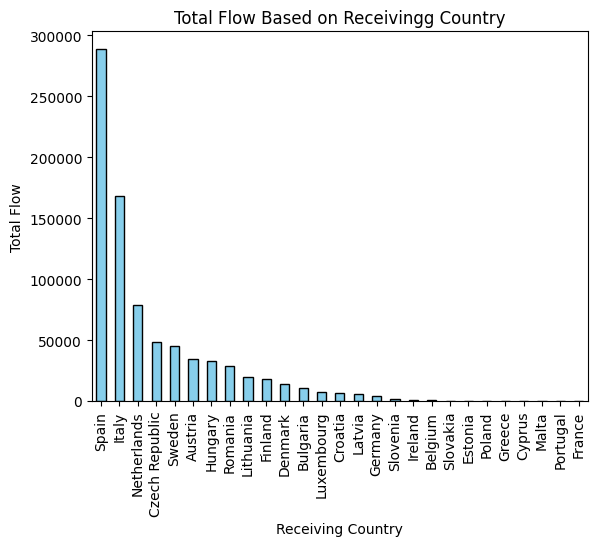

In [46]:
# Plot Total immigrants by receiving country
total_by_receiving.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Receiving Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Receivingg Country')

Which country has sent the highest number of immigrants to EU countries?

Concurrently with the aforementioned analysis, the table and plot below reveal that Ukraine, North African countries, and Southern Asian countries, along with some Latin American nations, are the primary sources of immigration. It is not unexpected to find China and India on these lists, given that they are the two most populous countries globally.

In [47]:
# Total number of immigrants by sending country
total_by_sending = euim_21[(euim_21['Age'] == 'TOTAL') & (euim_21['Gender'] == 'T')].groupby('Sending_Country')['Flow'].sum()
total_by_sending = total_by_sending.sort_values(ascending=False)
total_by_sending.head(10)


,Flow
Sending_Country,
Ukraine,79886
Morocco,78920
Colombia,43722
India,41506
Syrian Arab Republic,33237
Pakistan,31265
Russian Federation,29203
"Venezuela, Bolivarian Republic of",26455
China,26404


Text(0.5, 1.0, 'Total Flow Based on Sending Country')

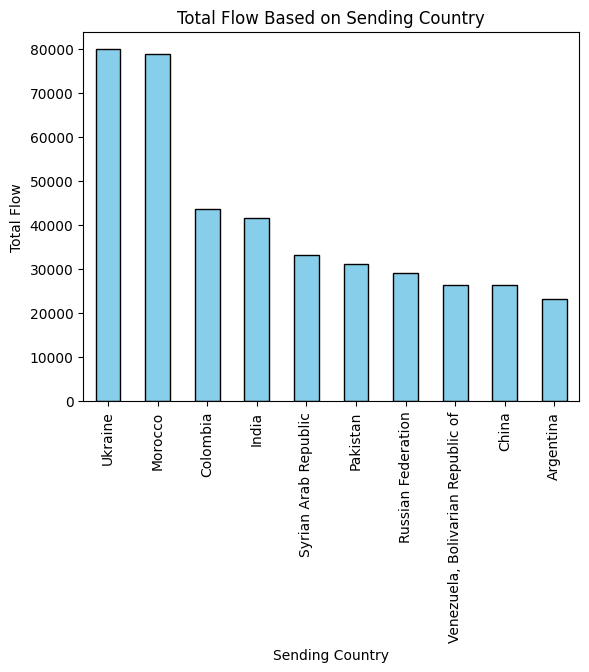

In [48]:
# Plot the immigrants by top- 10 sending country
total_by_sending.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Sending Country')
plt.ylabel('Total Flow')
plt.title('Total Flow Based on Sending Country')

## Further Analysis

This project endeavors to extend existing research by conducting a more in-depth analysis encompassing age, gender, and the countries of origin and destination. In addition to these factors, the study seeks to incorporate additional dimensions from the Eurostat system. Furthermore, the project aims to include transit countries for immigrants and visually depict migratory flows on a map.

An ultimate objective is to visually emphasize Turkey's geographical centrality as a transit country in migration routes from the Middle East, Africa, and South Asia to Europe. This visualization will be a valuable contribution to my dissertation research.

Another key goal is to integrate socio-economic and climate risk indicators from sending countries. This will allow for the exploration of relationships between the volume of immigrants arriving in EU countries and these specific indicators. The project aims to shed light on the complex interplay between migration patterns and socio-economic and environmental factors.